In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import numpy as np

In [2]:
#確定你是否有安裝正確
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
#gpu memory不足 就用
if gpus:  
    try:
        for gpu in gpus:
            tf.config.experimental.set_virtual_device_configuration(
                gpu,
                [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3000)]  
            )
    except RuntimeError as e:
        print(e)

tf.__version__   #tf版本

'2.5.0'

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPool2D

#定義輸入
input_shape = (224, 224, 3) # RGB影像224x224 (height, width, channel)

# 輸入層
img_input = Input(shape=input_shape, name='img_input')

# 第1個卷積區塊 (block1)
x = Conv2D(64, (3, 3), padding='same', activation='relu', name='block1_conv1')(img_input)
x = Conv2D(64, (3, 3), padding='same', activation='relu', name='block1_conv2')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# 第2個卷積區塊 (block2)
x = Conv2D(128, (3, 3), padding='same', activation='relu', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu', name='block2_conv2')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# 第3個卷積區塊 (block3)
x = Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv1')(x)
x = Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv2')(x)
x = Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv3')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# 第4個卷積區塊 (block4)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv1')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv2')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv3')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='block4_pool')(x)

# 第5個卷積區塊 (block5)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv1')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv2')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv3')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='block5_pool')(x)


x = Flatten(name='flatten')(x)
x = Dense(256, activation='relu', name='fc1')(x)            #4096(有改小)
x = Dense(64, activation='relu', name='fc2')(x)           #4096(有改小)
x = Dense(2, activation='sigmoid', name='predictions')(x)   #原本有1000類 #softmax


model = Model(inputs=img_input, outputs=x, name='vgg16-funcapi')


model.summary()

Model: "vgg16-funcapi"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_input (InputLayer)       [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

In [5]:
model = Model(inputs=img_input, outputs=x, name='vgg16-funcapi')

 
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train = "C:/Users/Administrator/vgg16 practice/observations-master/observations-master/experiements/dest_folder/train"
val = "C:/Users/Administrator/vgg16 practice/observations-master/observations-master/experiements/dest_folder/val"

trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=train,
                                       target_size=(224,224),
                                       class_mode='categorical', 
                                       shuffle=True,
                                      batch_size=16)  #預設batch size = 32 如果OOM發生就要降低
print(traindata.class_indices)

vldata = ImageDataGenerator()
valdata = vldata.flow_from_directory(directory=val, target_size=(224,224),class_mode='categorical', shuffle=True)
print(valdata.class_indices)



Found 1315 images belonging to 2 classes.
{'with_mask': 0, 'without_mask': 1}
Found 142 images belonging to 2 classes.
{'with_mask': 0, 'without_mask': 1}


In [7]:
import os
save_dir = "C:/Users/Administrator/VGG16 correct/saved_models"  #train model store_path
model_path = os.path.join(save_dir, 'mask_model.h5')
model.save(model_path)


if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
    
model_path = os.path.join(save_dir, 'model_name_save')

In [8]:
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint

filepath = 'C:/Users/Administrator/vgg16 practice/saved_models'


checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', 
                             verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='auto', save_freq = 'epoch')#每一epoch更新一次

earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')#20次val_acc沒提高就stop

In [9]:
# imp
train_history = model.fit(traindata, validation_data=valdata, epochs=20, 
                          steps_per_epoch=len(traindata),  
                          validation_steps=len(valdata),  
                          callbacks=[checkpoint, earlystop],
                         verbose=1)
print(train_history.history)

model.save(model_path)

Epoch 1/20
83/83 [==============================] - 56s 553ms/step - loss: 0.3588 - accuracy: 0.8479 - val_loss: 0.1273 - val_accuracy: 0.9577

Epoch 00001: val_accuracy improved from -inf to 0.95775, saving model to C:/Users/Administrator/VGG16 correct/saved_models\model_name_save
INFO:tensorflow:Assets written to: C:/Users/Administrator/VGG16 correct/saved_models\model_name_save\assets
Epoch 2/20
83/83 [==============================] - 32s 385ms/step - loss: 0.1392 - accuracy: 0.9597 - val_loss: 0.1608 - val_accuracy: 0.9155

Epoch 00002: val_accuracy did not improve from 0.95775
Epoch 3/20
83/83 [==============================] - 32s 382ms/step - loss: 0.1333 - accuracy: 0.9589 - val_loss: 0.1243 - val_accuracy: 0.9507

Epoch 00003: val_accuracy did not improve from 0.95775
Epoch 4/20
83/83 [==============================] - 32s 383ms/step - loss: 0.0940 - accuracy: 0.9810 - val_loss: 0.0982 - val_accuracy: 0.9718

Epoch 00004: val_accuracy improved from 0.95775 to 0.97183, saving 

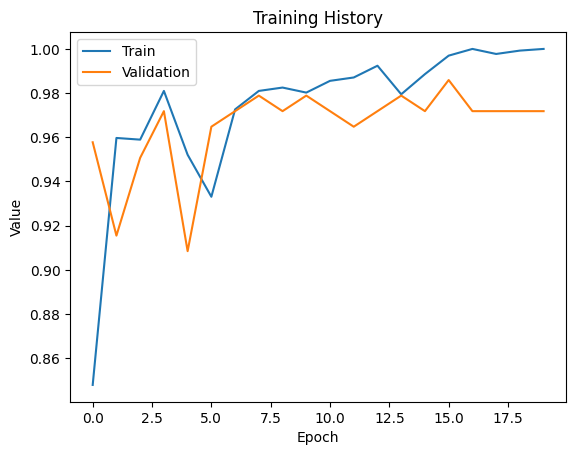

In [10]:
import matplotlib.pyplot as plt

def show_train_history(train_history, train_metric, val_metric):
    plt.plot(train_history.history[train_metric])
    plt.plot(train_history.history[val_metric])
    plt.title('Training History')
    plt.ylabel('Value')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
show_train_history(train_history, 'accuracy', 'val_accuracy')

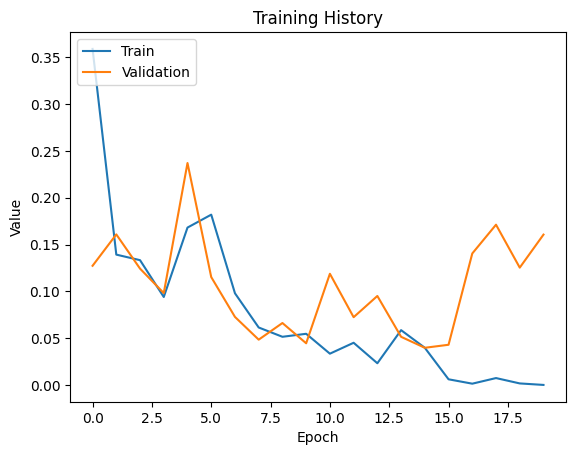

In [11]:
def show_loss_history(train_history):
    plt.plot(train_history.history['loss'])
    plt.plot(train_history.history['val_loss'])
    plt.title('Loss History')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

show_train_history(train_history, 'loss', 'val_loss') 

without_mask
戴口罩機率： 7.602711e-12
沒戴口罩機率： 1.0


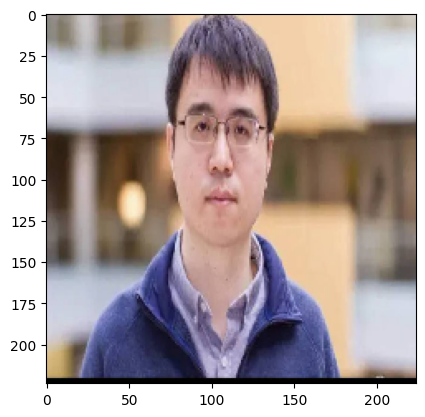

In [12]:
#train model predict
from IPython.display import Image
from tensorflow.keras.models import load_model


img_path = "../VGG16 correct/phpRUycdC.jpg"  #放你要測試模型的img
img = image.load_img(img_path, target_size=(224, 224))



img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
saved_model = load_model(model_path)
result = saved_model.predict(img)
if result[0][0] > result[0][1]:
    print("wath_mask")
else:
    print('without_mask')

Image(img_path, width=400)


print("戴口罩機率：", result[0][0])
print("沒戴口罩機率：", result[0][1])